In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sns

In [2]:
production='Sugarcane_final.xlsx'
data = pd.read_excel(production)
data=data.sort_values(by=['Year','Indian State'])
data

,Indian State,Year,Production,Rainfall,Temperature
0,Andhra Pradesh,2005,15739.0,2288.00,27.82
16,Assam,2005,883.9,1234.15,23.60
32,Bihar,2005,4111.7,907.80,25.82
48,Gujarat,2005,14570.0,1948.00,26.85
64,Haryana,2005,8060.0,519.50,24.80
...,...,...,...,...,...
255,Tamil Nadu,2020,14119.1,988.40,28.07
271,Telangana,2020,2012.9,1350.30,21.17
287,Uttar Pradesh,2020,179539.1,1421.60,25.62
303,Uttarakhand,2020,6937.7,1373.00,14.14


In [3]:
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

In [4]:
y = np.array(data['Production'])
X = data.drop(['Indian State','Production','Year'], axis=1)
#feature_list=list(X.columns)
X=np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_test.shape

(64, 2)

In [6]:
y_train.shape

(256,)

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [9]:
m=y_test.mean()
y_diff=y_test-y_pred
d=y_diff.mean()
err=d/m*100
err="{:.2f}".format(err)
print('The error is '+str(err)+'%.')

The error is 29.68%.


Text(0, 0.5, 'Predictions ')

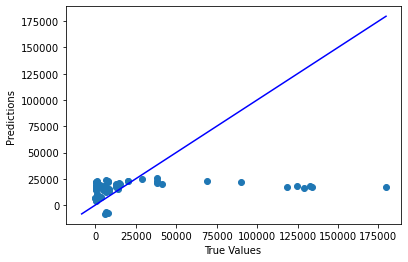

In [10]:
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')